In [0]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


# Installing fasttext

In [0]:
!git clone https://github.com/facebookresearch/fastText.git

Cloning into 'fastText'...
remote: Enumerating objects: 3531, done.
remote: Total 3531 (delta 0), reused 0 (delta 0), pack-reused 3531
Receiving objects: 100% (3531/3531), 8.02 MiB | 13.52 MiB/s, done.
Resolving deltas: 100% (2225/2225), done.


In [0]:
cd fastText/

/content/fastText


In [0]:
!pip install .

Processing /content/fastText
  Created wheel for fasttext: filename=fasttext-0.9.1-cp36-cp36m-linux_x86_64.whl size=2827398 sha256=ae51812885968ec019783acebc600ee4320c11beaf28250d57747e7644625219
  Stored in directory: /tmp/pip-ephem-wheel-cache-zdryqyb4/wheels/a1/9f/52/696ce6c5c46325e840c76614ee5051458c0df10306987e7443
Successfully built fasttext


# Load and combine eng-hindi dictionary

In [0]:
def load_embedding_dict(embedding_path, embedding_size, embedding_format):
    """
    Load emb dict from file, or load pre trained binary fasttext model.
    Args:
        embedding_path: path to the vec file, or binary model
        embedding_size: int, embedding_size
        embedding_format: 'bin' or 'vec'

    Returns: Embeddings dict, or fasttext pre trained model

    """
    print("Loading word embeddings from {}...".format(embedding_path))
    count = 0
    count_t = 0
    if embedding_format == 'vec':
        default_embedding = np.zeros(embedding_size)
        embedding_dict = collections.defaultdict(lambda: default_embedding)
        skip_first = embedding_format == "vec"
        with open(embedding_path) as f:
            
            for i, line in enumerate(f.readlines()):
                if skip_first and i == 0:
                    continue
                splits = line.split()
                # print(len(splits),i)
                if (len(splits) == embedding_size + 1):
                    count_t = count_t+1
                    word = splits[0]
                    embedding = np.array([float(s) for s in splits[1:]])
                    embedding_dict[word] = embedding
                else:
                    count = count+1
    elif embedding_format == 'bin':
        embedding_dict = fasttext.load_model(embedding_path)
    else:
        raise ValueError('Not supported embeddings format {}'.format(embedding_format))
    print("Done loading word embeddings.")
    print(count_t,count)
    return embedding_dict 

In [0]:
import collections
import numpy as np


In [0]:
hi_dictionary = load_embedding_dict("/content/gdrive/My Drive/minor_project2/wiki.hi.align.vec", embedding_size = 300, embedding_format = "vec")

Loading word embeddings from /content/gdrive/My Drive/minor_project2/wiki.hi.align.vec...
Done loading word embeddings.
157993 23


In [0]:
en_dictionary = load_embedding_dict("/content/gdrive/My Drive/minor_project2/wiki.en.align.vec", embedding_size = 300, embedding_format = "vec")

Loading word embeddings from /content/gdrive/My Drive/minor_project2/wiki.en.align.vec...
Done loading word embeddings.
2519178 192


In [0]:
# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-aligned/wiki.en.align.vec

In [0]:
# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-aligned/wiki.hi.align.vec

In [0]:
# !cp /content/fastText/wiki.en.align.vec "/content/gdrive/My Drive/minor_project2/"

In [0]:
# !cp /content/fastText/wiki.hi.align.vec "/content/gdrive/My Drive/minor_project2/"

In [0]:
z = {**hi_dictionary, **en_dictionary}

In [0]:
# import pickle

In [0]:
# with open('/content/gdrive/My Drive/minor_project2/en_hi_dict.txt', 'wb') as handle:
#   pickle.dump(z, handle)

# Load dataset

## Hindi

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from keras.callbacks import ModelCheckpoint

In [0]:
data = pd.read_csv('/content/gdrive/My Drive/minor_project2/csv files/label_Partho - label_Partho.csv')
data2 = pd.read_csv('/content/gdrive/My Drive/minor_project2/csv files/label_Adarsh - label_Adarsh.csv')
data3 = pd.read_csv('/content/gdrive/My Drive/minor_project2/csv files/label_Keshav - label_Keshav.csv')
data4 = pd.read_csv('/content/gdrive/My Drive/minor_project2/csv files/label_Gaurav - label_Gaurav.csv')


In [0]:
df1 = data.dropna(subset=['location1'])
df2 = data2.dropna(subset=['location1'])
df3 = data3.dropna(subset=['location1'])
df4 = data4.dropna(subset=['location1'])
combined_df = pd.concat([df1, df2, df3, df4], sort=False)

In [0]:
combined_df = combined_df[['id','text','location1','location2','location3','location4','location5']]

combined_df

tweet = list(combined_df['text'])
location1 = list(combined_df['location1'])
location2 = list(combined_df['location2'])
location3 = list(combined_df['location3'])
location4 = list(combined_df['location4'])
location5 = list(combined_df['location5'])

## English

In [0]:
data_eng = pd.read_csv("/content/gdrive/My Drive/minor_project2/model/Eq_Lab3000.csv")

In [0]:
data_eng = data_eng[['tweets','labels']]

In [0]:
data_eng = data_eng.dropna(subset=['labels'])

In [0]:
data_eng = data_eng[data_eng['labels'] != '0']

In [0]:
data_eng

,tweets,labels
1,earthquake m km ssw of gambell alaska mins ago...,6 7
3,rt tremblement de terre mag km de jiangzikeng ...,8
4,rt and on the th anniversary of the earthquake...,11
5,rt and now we re reaching the present moment i...,16
8,rt massive magnitude earthquake hits taipei,6
...,...,...
2994,rt earthquake m alaska peninsula mins ago jan ...,4 5
2996,annelizebester rt laco f twenty four years ago...,14
2997,earthquake in san francisco bitcoin s dear god...,3 4 9 10
2999,here s what the office looked like after the n...,10


In [0]:
tweet_eng = list(data_eng['tweets'])
labels = list(data_eng['labels'])

In [0]:
labels

['6 7',
 '8',
 '11',
 '16',
 '6',
 '16',
 '4 5',
 '32',
 '8 9',
 '7 8',
 '23',
 '6 7',
 '2 3',
 ' 8 13',
 '12 13',
 '9',
 '9',
 '7',
 '5',
 '5',
 '9',
 '26',
 '14',
 '7 19',
 '26',
 '9',
 '7',
 '17 18 19 20 21 22 23 24',
 '6 7 8',
 '9',
 '14 41',
 '4 5 9',
 '8 9 10 11',
 '18',
 '10 11 12 13',
 '13 23',
 '11 12',
 '9 10 11',
 '4 5',
 '9 10 17',
 '8',
 '4 5 6',
 '1',
 '15 16 17 22 26',
 '5',
 '30 31',
 '4',
 '8',
 '7 8',
 '9 10 11',
 '8 9 10',
 '20',
 '4 5 9',
 '9 10',
 '9',
 '6 7 8 12',
 '9',
 '5 6',
 '13',
 '5 8',
 '2 14',
 '7',
 '5 6',
 '7 8 9',
 '2 10',
 '5 6',
 '5',
 '2 3 4 5',
 '8 9 10',
 '9',
 '6',
 '1 2',
 '10',
 '14',
 '8 9',
 '8',
 '9 10',
 '9 10 11 12',
 '4',
 '10 13 17 37',
 '10',
 '8',
 '6 7 11',
 '2 3',
 '4',
 '1',
 '4 5 6 10',
 '9 10',
 '11 12',
 '11 12',
 '7',
 '6 7',
 '16',
 '5',
 '3',
 '7 8',
 '1 2 3 4 6',
 '4 8',
 '13',
 '7 8 9 10',
 '5',
 '1 2 3 4 5 7',
 '5  31',
 ' 6 7',
 '3 4',
 '5 7 8',
 '4',
 '5',
 '4',
 '16',
 '6',
 '9  11 12  15',
 '7 8',
 '7',
 '14',
 '10',
 '6

# Pre process tweet

## Hindi

In [0]:
import string,re

In [0]:
def preprocess_tweet(text):

#     # Check characters to see if they are in punctuation
#     nopunc = [char for char in text if char not in string.punctuation]
#     # Join the characters again to form the string.
#     nopunc = ''.join(nopunc)
    # convert text to lower-case
#     nopunc = nopunc.lower()
    # remove URLs
    nopunc = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text)
    nopunc = re.sub(r'http\S+', '', nopunc)
    # remove usernames
    nopunc = re.sub('@[^\s]+', '', nopunc)
    
    nopunc = re.sub(r'([\'\"\.\(\)\!\?\-\\\/\,])', r' ', nopunc)
    nopunc = re.sub(r'([\;\:\|•«\n])', ' ', nopunc)
    # remove the # in #hashtag
#     nopunc = re.sub(r'#([^\s]+)', r'\1', nopunc)
    nopunc = re.sub(r'#\w*','',nopunc)
    # remove repeated characters
#     nopunc = word_tokenize(nopunc)
    # remove stopwords from final word list
#     return [word for word in nopunc if word not in stopwords.words('english')]
    try:
        nopunc = re.sub(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])', '',nopunc)
    except re.error:
        nopunc = re.sub(u'([\u2600-\u27BF])|([\uD83C][\uDF00-\uDFFF])|([\uD83D][\uDC00-\uDE4F])|([\uD83D][\uDE80-\uDEFF])', '', nopunc)
    nopunc = [char for char in nopunc if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return nopunc

In [0]:
for i in range(0,len(tweet)):
    tweet[i] = preprocess_tweet(tweet[i])

In [0]:
all_locations = []
for i in range(0, len(location1)):
    temp = []
    if type(location1[i]) == str:
        temp.append(location1[i])
    if type(location2[i]) == str:
        temp.append(location2[i])
    if type(location3[i]) == str:
        temp.append(location3[i])
    if type(location4[i]) == str:
        temp.append(location4[i])
    if type(location5[i]) == str:
        temp.append(location5[i])
    all_locations.append(temp)

In [0]:
all_locations_sep = []
for i in range(0,len(all_locations)):
    t = []
    for j in range(0,len(all_locations[i])):
        xx = all_locations[i][j].split()
        for k in range(0, len(xx)):
            t.append(xx[k])
    all_locations_sep.append(t)

## English

In [0]:
def preprocess_tweet(text):

#     # Check characters to see if they are in punctuation
#     nopunc = [char for char in text if char not in string.punctuation]
#     # Join the characters again to form the string.
#     nopunc = ''.join(nopunc)
    # convert text to lower-case
#     nopunc = nopunc.lower()
    # remove URLs
    nopunc = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text)
    nopunc = re.sub(r'http\S+', '', nopunc)
    # remove usernames
    nopunc = re.sub('@[^\s]+', '', nopunc)
    
    nopunc = re.sub(r'([\'\"\.\(\)\!\?\-\\\/\,])', r' ', nopunc)
    nopunc = re.sub(r'([\;\:\|•«\n])', ' ', nopunc)
    # remove the # in #hashtag
#     nopunc = re.sub(r'#([^\s]+)', r'\1', nopunc)
    nopunc = re.sub(r'#\w*','',nopunc)
    # remove repeated characters
#     nopunc = word_tokenize(nopunc)
    # remove stopwords from final word list
#     return [word for word in nopunc if word not in stopwords.words('english')]
    try:
        nopunc = re.sub(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])', '',nopunc)
    except re.error:
        nopunc = re.sub(u'([\u2600-\u27BF])|([\uD83C][\uDF00-\uDFFF])|([\uD83D][\uDC00-\uDE4F])|([\uD83D][\uDE80-\uDEFF])', '', nopunc)
    nopunc = [char for char in nopunc if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return nopunc

In [0]:
for i in range(0,len(tweet_eng)):
    tweet_eng[i] = preprocess_tweet(tweet_eng[i])

In [0]:
labels[0].split()

['6', '7']

In [0]:
all_locations_sep_eng = []
for i in range(0,len(labels)):
    # print(i)
    t = []
    xx = labels[i].split()
    for k in range(0, len(xx)):
            t.append(int((xx[k]))-1)
    all_locations_sep_eng.append(t)

In [0]:
all_locations_sep_eng

[[5, 6],
 [7],
 [10],
 [15],
 [5],
 [15],
 [3, 4],
 [31],
 [7, 8],
 [6, 7],
 [22],
 [5, 6],
 [1, 2],
 [7, 12],
 [11, 12],
 [8],
 [8],
 [6],
 [4],
 [4],
 [8],
 [25],
 [13],
 [6, 18],
 [25],
 [8],
 [6],
 [16, 17, 18, 19, 20, 21, 22, 23],
 [5, 6, 7],
 [8],
 [13, 40],
 [3, 4, 8],
 [7, 8, 9, 10],
 [17],
 [9, 10, 11, 12],
 [12, 22],
 [10, 11],
 [8, 9, 10],
 [3, 4],
 [8, 9, 16],
 [7],
 [3, 4, 5],
 [0],
 [14, 15, 16, 21, 25],
 [4],
 [29, 30],
 [3],
 [7],
 [6, 7],
 [8, 9, 10],
 [7, 8, 9],
 [19],
 [3, 4, 8],
 [8, 9],
 [8],
 [5, 6, 7, 11],
 [8],
 [4, 5],
 [12],
 [4, 7],
 [1, 13],
 [6],
 [4, 5],
 [6, 7, 8],
 [1, 9],
 [4, 5],
 [4],
 [1, 2, 3, 4],
 [7, 8, 9],
 [8],
 [5],
 [0, 1],
 [9],
 [13],
 [7, 8],
 [7],
 [8, 9],
 [8, 9, 10, 11],
 [3],
 [9, 12, 16, 36],
 [9],
 [7],
 [5, 6, 10],
 [1, 2],
 [3],
 [0],
 [3, 4, 5, 9],
 [8, 9],
 [10, 11],
 [10, 11],
 [6],
 [5, 6],
 [15],
 [4],
 [2],
 [6, 7],
 [0, 1, 2, 3, 5],
 [3, 7],
 [12],
 [6, 7, 8, 9],
 [4],
 [0, 1, 2, 3, 4, 6],
 [4, 30],
 [5, 6],
 [2, 3],
 [4, 6, 

# Function to tokenize

## Hindi

In [0]:
import string, re, sys, codecs

In [0]:
# from indicnlp.common import IndicNlpException

### tokenizer patterns 
triv_tokenizer_indic_pat=re.compile(r'(['+string.punctuation+r'\u0964\u0965'+r'])')
triv_tokenizer_urdu_pat=re.compile(r'(['+string.punctuation+r'\u0609\u060A\u060C\u061E\u066A\u066B\u066C\u066D\u06D4'+r'])')

## date, numbers, section/article numbering
pat_num_seq=re.compile(r'([0-9]+ [,.:/] )+[0-9]+')

def trivial_tokenize_indic(s): 
    """
    A trivial tokenizer which just tokenizes on the punctuation boundaries. This also includes punctuations for the Indian language scripts
      - the purna virama and the deergha virama
    returns a list of tokens   
    """
    tok_str=triv_tokenizer_indic_pat.sub(r' \1 ',s.replace('\t',' '))
#     return re.sub(r'[ ]+',' ',tok_str).strip(' ').split(' ')

    s=re.sub(r'[ ]+',' ',tok_str).strip(' ')
    
    # do not tokenize numbers and dates
    new_s=''
    prev=0
    for m in pat_num_seq.finditer(s):
        start=m.start()
        end=m.end()
        if start>prev:
            new_s=new_s+s[prev:start]
            new_s=new_s+s[start:end].replace(' ','')
            prev=end
   
    new_s=new_s+s[prev:]
    s=new_s
    
    return s.split(' ')

def trivial_tokenize_urdu(s): 
    """
    A trivial tokenizer which just tokenizes on the punctuation boundaries. This also includes punctuations for the Urdu script.
    These punctuations characters were identified from the Unicode database for Arabic script by looking for punctuation symbols.
    returns a list of tokens   
    """
    tok_str=triv_tokenizer_urdu_pat.sub(r' \1 ',s.replace('\t',' '))
    return re.sub(r'[ ]+',' ',tok_str).strip(' ').split(' ')

def trivial_tokenize(s,lang='hi'): 
    """
    Trivial tokenizer for languages in the Indian sub-continent
    """
    if lang=='ur':
        return trivial_tokenize_urdu(s)
    else:
        return trivial_tokenize_indic(s)

## English

In [0]:

# import nltk
# nltk.download('all')

In [0]:
# from nltk.tokenize import word_tokenize

# One hot encode

## Hindi

In [0]:
def boolean_vec(tweet):
    import math
    one_hot_encoded=[]
    for i in range(0,len(tweet)):
        tText = tweet[i]
        splits = trivial_tokenize(tText)
        temp = [0]*len(splits)
        for x in range(0,len(splits)):
            for l in all_locations_sep[i]:
                if l==splits[x]:
                    temp[x] = 1
#             if l1==x or l1 in x:
#                 temp.append(1)
#             if type(l2)==str and (l2==x or l2 in x):
#                 temp.append(1)
#             if type(l3)==str and (l3==x or l3 in x):
#                 temp.append(1)
#             if type(l4)==str and (l4==x or l4 in x):
#                 temp.append(1)
#             if type(l5)==str and (l5==x or l5 in x):
#                 temp.append(1)
#             else:
#                 temp.append(0)
        one_hot_encoded.append(temp)
        temp=[]
    return one_hot_encoded

In [0]:
one_hot_encoded = boolean_vec(tweet)

In [0]:
maxlen = 0
for i in range(0,len(one_hot_encoded)):
    maxlen = max(len(one_hot_encoded[i]),maxlen)
print(maxlen)

72


In [0]:
MAX_SEQUENCE_LENGTH = maxlen #72

In [0]:
for i in range(0,len(one_hot_encoded)):
    pad_len = MAX_SEQUENCE_LENGTH - len(one_hot_encoded[i])
    for j in range(0,pad_len):
        one_hot_encoded[i].append(0)

In [0]:
for i in range(0,len(one_hot_encoded)):
    if(len(one_hot_encoded[i]) != MAX_SEQUENCE_LENGTH):
        print("Not encoded")

## English

In [0]:
def boolean_vec_eng(tweet):
    import math
    one_hot_encoded=[]
    for i in range(0,len(tweet)):
        tText = tweet[i]
        splits = trivial_tokenize(tText)
        temp = [0]*len(splits)
        bound = list(range(0,len(splits)))
        # for x in range(0,len(splits)):
        for l in all_locations_sep_eng[i]:
            if l in bound:
                temp[l] = 1
#             if l1==x or l1 in x:
#                 temp.append(1)
#             if type(l2)==str and (l2==x or l2 in x):
#                 temp.append(1)
#             if type(l3)==str and (l3==x or l3 in x):
#                 temp.append(1)
#             if type(l4)==str and (l4==x or l4 in x):
#                 temp.append(1)
#             if type(l5)==str and (l5==x or l5 in x):
#                 temp.append(1)
#             else:
#                 temp.append(0)
        one_hot_encoded.append(temp)
        temp=[]
    return one_hot_encoded

In [0]:
one_hot_encoded_eng = boolean_vec_eng(tweet_eng)

In [0]:
tweet_eng[176]
all_locations_sep_eng[176]

[7, 8]

In [0]:
i = 176
m = trivial_tokenize(tweet_eng[i])
for j in range(0,len(m)):
    print(m[j],":",one_hot_encoded_eng[i][j])

earthquake : 0
usgs : 0
forecast : 0
m : 0
km : 0
n : 0
of : 0
chichi : 1
shima : 1
japan : 0
time : 0
utc : 0
at : 0
epicenter : 0
location : 0
n : 0
e : 0
dep : 0


In [0]:
maxlen_eng = 0
for i in range(0,len(one_hot_encoded_eng)):
    maxlen_eng = max(len(one_hot_encoded_eng[i]),maxlen_eng)
print(maxlen_eng)

55


In [0]:
for i in range(0,len(one_hot_encoded_eng)):
    pad_len = MAX_SEQUENCE_LENGTH - len(one_hot_encoded_eng[i])
    for j in range(0,pad_len):
        one_hot_encoded_eng[i].append(0)

In [0]:
for i in range(0,len(one_hot_encoded_eng)):
    if(len(one_hot_encoded_eng[i]) != MAX_SEQUENCE_LENGTH):
        print("Not encoded")

# Embedding word vector

In [0]:
print(len(combined_df),len(tweet),len(one_hot_encoded))
print(len(data_eng),len(tweet_eng),len(one_hot_encoded_eng))

1942 1942 1942
1903 1903 1903


In [0]:
window_length = 72
n_features = 300

In [0]:
def get_word_vector(word):
    embedding_vector = z.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        return embedding_vector

In [0]:
# get_word_vector('thetftfft')

In [0]:
def text_to_vector(text):
    
    words = trivial_tokenize(text)

    window = words[:window_length]
    
    x = np.zeros((window_length, n_features))

    for i, word in enumerate(window):
        if get_word_vector(word) is not None:
            x[i, :] = get_word_vector(word).astype('float32')

    return x

In [0]:
def df_to_data(df,tw):
    
    x = np.zeros((len(df), window_length, n_features), dtype='float32')

    for i, comment in enumerate(tw):
        x[i, :] = text_to_vector(comment)

    return x

In [0]:
X_data_hi = df_to_data(combined_df,tweet)
X_data_en = df_to_data(data_eng,tweet_eng)

In [0]:
X_data_hi.shape

(1942, 72, 300)

In [0]:
X_data_en.shape

(1903, 72, 300)

In [0]:
X_data = np.concatenate((X_data_hi, X_data_en), axis=0)

In [0]:
X_data.shape

(3845, 72, 300)

In [0]:
from keras.utils import to_categorical
y_hi = [to_categorical(i, num_classes=2) for i in one_hot_encoded]

In [0]:
from keras.utils import to_categorical
y_en = [to_categorical(i, num_classes=2) for i in one_hot_encoded_eng]

In [0]:
y_hi = np.asarray(y_hi)
y_en = np.asarray(y_en)

In [0]:
y_hi.shape

(1942, 72, 2)

In [0]:
y_en.shape

(1903, 72, 2)

In [0]:
y_data = np.concatenate((y_hi,y_en),axis=0)

In [0]:
y_data.shape

(3845, 72, 2)

# Train test split

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [0]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3076, 72, 300) (769, 72, 300) (3076, 72, 2) (769, 72, 2)


# Install keras contrib

In [0]:
cd /content/

/content


In [0]:
!git clone https://www.github.com/keras-team/keras-contrib.git

Cloning into 'keras-contrib'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 3628 (delta 2), reused 1 (delta 0), pack-reused 3622
Receiving objects: 100% (3628/3628), 861.55 KiB | 3.37 MiB/s, done.
Resolving deltas: 100% (2324/2324), done.


In [0]:
cd keras-contrib

/content/keras-contrib


In [0]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating keras_contrib.egg-info
writing keras_contrib.egg-info/PKG-INFO
writing dependency_links to keras_contrib.egg-info/dependency_links.txt
writing requirements to keras_contrib.egg-info/requires.txt
writing top-level names to keras_contrib.egg-info/top_level.txt
writing manifest file 'keras_contrib.egg-info/SOURCES.txt'
writing manifest file 'keras_contrib.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/keras_contrib
copying keras_contrib/__init__.py -> build/lib/keras_contrib
creating build/lib/keras_contrib/losses
copying keras_contrib/losses/jaccard.py -> build/lib/keras_contrib/losses
copying keras_contrib/losses/__init__.py -> build/lib/keras_contrib/losses
copying keras_contrib/losses/crf_losses.py -> build/lib/keras_contrib/losses
copying keras_contrib/losses/dssim.py -> build/lib/keras_contrib/losses
crea

# Model2

In [0]:
# del model4

## Training

In [0]:
from keras.models import Model, load_model
from keras.layers import Dense, Input, Dropout, GRU, Activation, Bidirectional, LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras import backend as K
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from keras_contrib.layers.crf import CRF

In [0]:
input_i = Input(shape=(72,300,),dtype='float32')
X = Bidirectional(LSTM(512,return_sequences=True))(input_i)
X = Dropout(0.5)(X)
X = Bidirectional(LSTM(256,return_sequences=True))(X)
X = Dropout(0.5)(X)
X = Bidirectional(LSTM(128,return_sequences=True))(X)
X = Dropout(0.5)(X)
# X = Dense(2, activation='sigmoid')(X)
# X = TimeDistributed(Dense(2, activation="softmax"))(X)
X = Bidirectional(LSTM(2,return_sequences=True))(X)
X = CRF(2)(X)
model4 = Model(input_i, X)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model4.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 72, 300)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 72, 1024)          3330048   
_________________________________________________________________
dropout_1 (Dropout)          (None, 72, 1024)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 72, 512)           2623488   
_________________________________________________________________
dropout_2 (Dropout)          (None, 72, 512)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 72, 256)           656384    
_________________________________________________________________
dropout_3 (Dropout)          (None, 72, 256)           0   

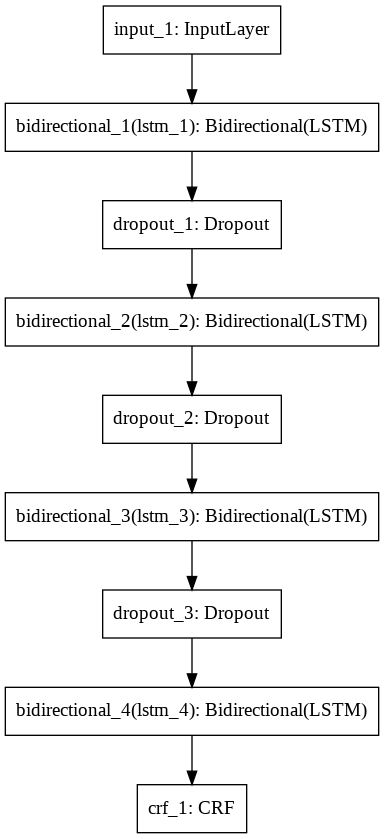

In [0]:
from keras.utils import plot_model
plot_model(model4, to_file='model.png')

from PIL import Image
Image.open("model.png")

In [0]:
crf_layer = CRF(2)

In [0]:
model4.compile(optimizer='adam', loss=crf_layer.loss_function, metrics=[crf_layer.accuracy])

/content/keras-contrib/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/content/keras-contrib/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from keras.callbacks import ModelCheckpoint

In [0]:
# filepath="/content/gdrive/My Drive/minor_project2/weightsnew_all3.best.hdf5"
filepath="/content/gdrive/My Drive/minor_project2_personal/model_eng_hi_2.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [0]:
history = model4.fit(X_train, y_train,validation_data=(X_test, y_test), epochs = 10,batch_size=32,callbacks=callbacks_list)




Train on 3076 samples, validate on 769 samples
Epoch 1/10





3076/3076 [==============================] - 98s 32ms/step - loss: 0.0916 - crf_viterbi_accuracy: 0.9746 - val_loss: 0.0851 - val_crf_viterbi_accuracy: 0.9746

Epoch 00001: val_loss improved from inf to 0.08505, saving model to /content/gdrive/My Drive/minor_project2_personal/model_eng_hi_2.best.hdf5
Epoch 2/10
3076/3076 [==============================] - 88s 29ms/step - loss: 0.0822 - crf_viterbi_accuracy: 0.9747 - val_loss: 0.0802 - val_crf_viterbi_accuracy: 0.9746

Epoch 00002: val_loss improved from 0.08505 to 0.08021, saving model to /content/gdrive/My Drive/minor_project2_personal/model_eng_hi_2.best.hdf5
Epoch 3/10
3076/3076 [==============================] - 88s 28ms/step - loss: 0.0685 - crf_viterbi_accuracy: 0.9747 - val_loss: 0.0578 - val_crf_viterbi_accuracy: 0.9746

Epoch 00003: val_loss improved from 0.08021 to 0.05784, saving model to /content/gdrive/My Drive/minor_project2_personal/model_eng_hi_2.best.hdf

In [0]:
model4.load_weights(filepath)

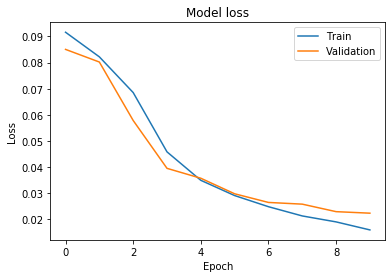

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Testing

In [0]:
p = model4.predict(np.array(X_test))

from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, 2).ravel(), np.argmax(p, axis=2).ravel(),labels=[0,1], target_names=["other","disaster place"]))


                precision    recall  f1-score   support

         other       1.00      0.99      1.00     53960
disaster place       0.80      0.84      0.82      1408

      accuracy                           0.99     55368
     macro avg       0.90      0.92      0.91     55368
  weighted avg       0.99      0.99      0.99     55368



## Manual Testing

In [0]:
def check_model2(tweet):
    text = preprocess_tweet(tweet)
    
    x = np.zeros((1, window_length, n_features), dtype='float32')
    x[0, :] = text_to_vector(text)
    
    
    p = model4.predict(x)

    op = (np.argmax(p, axis=2))
    i = 0
    
    for word in trivial_tokenize(text):
        print(word,':',op[0][i])
        i+=1
    

In [0]:
check_model2('State of natural disaster declared as extreme flooding displaces 50 000 in Congo')

State : 0
of : 0
natural : 0
disaster : 0
declared : 0
as : 0
extreme : 0
flooding : 0
displaces : 0
50 : 0
000 : 0
in : 0
Congo : 0


In [0]:
def check_model3(tweet):

    text = preprocess_tweet(tweet)
 
    x = np.zeros((1, window_length, n_features), dtype='float32')
    x[0, :] = text_to_vector(text)
    
    p = model4.predict(x)

    op = (np.argmax(p, axis=2))
    
    return op[0]
    

In [0]:
tweet_joined = tweet + tweet_eng
one_hot_encoded_joined = one_hot_encoded + one_hot_encoded_eng

In [0]:
check_model2('महाराष्ट्र  केरल  गुजरात  कर्नाटक और मध्य प्रदेश में भारी बारिश और बाढ़ की वजह से  160 से अधिक लोगों की मौत बेहद दुखद है। एनडीआरएफ  वायुसेना और नेवी ने लाखों लोगों को सुरक्षित स्थानों पर पहुंचाया है। ईश्वर से बाढ़ प्रभावित लोगों के सुरक्षित रहने की कामना करता हूं।')

महाराष्ट्र : 0
केरल : 1
गुजरात : 0
कर्नाटक : 1
और : 0
मध्य : 1
प्रदेश : 1
में : 0
भारी : 0
बारिश : 0
और : 0
बाढ़ : 0
की : 0
वजह : 0
से : 0
160 : 0
से : 0
अधिक : 0
लोगों : 0
की : 0
मौत : 0
बेहद : 0
दुखद : 0
है : 0
। : 0
एनडीआरएफ : 0
वायुसेना : 0
और : 0
नेवी : 0
ने : 0
लाखों : 0
लोगों : 0
को : 0
सुरक्षित : 0
स्थानों : 0
पर : 0
पहुंचाया : 0
है : 0
। : 0
ईश्वर : 0
से : 0
बाढ़ : 0
प्रभावित : 0
लोगों : 0
के : 0
सुरक्षित : 0
रहने : 0
की : 0
कामना : 0
करता : 0
हूं : 0
। : 0


In [0]:
check_model2("moderate earthquake kuril islands 16 january at 10 am")

moderate : 0
earthquake : 0
kuril : 1
islands : 1
16 : 0
january : 0
at : 0
10 : 0
am : 0


In [0]:
check_model2("#Dorian 'डोरियन तूफान के बाद जल  खाद्य सहायता  आश्रय और संचार की आवश्यकताएं बहामास के लोगों की मदद कर रही यूएन एजेंसियों की सर्वोच्च मानवीय प्राथमिकताएं हैं'")

डोरियन : 0
तूफान : 0
के : 0
बाद : 0
जल : 0
खाद्य : 0
सहायता : 0
आश्रय : 0
और : 0
संचार : 0
की : 0
आवश्यकताएं : 0
बहामास : 1
के : 0
लोगों : 0
की : 0
मदद : 0
कर : 0
रही : 0
यूएन : 0
एजेंसियों : 0
की : 0
सर्वोच्च : 0
मानवीय : 0
प्राथमिकताएं : 0
हैं : 0


In [0]:
check_model2("earthquake sismo m strikes km sw of laguna niguel california 30 min ago more info")

earthquake : 0
sismo : 0
m : 0
strikes : 0
km : 0
sw : 0
of : 0
laguna : 1
niguel : 1
california : 1
30 : 0
min : 0
ago : 0
more : 0
info : 0
